# Part 1: Fine-tuning an Image Captioning Model

## 1. Install the necessary libraries:

In [ ]:
pip install transformers -q

In [ ]:
pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00


In [ ]:
pip install accelerate -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
pip install evaluate -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
pip install jiwer -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.8 MB/s eta 0:00:00


In [ ]:
pip install transformers[torch] -q

## 2. Prepare and Preprocess Dataset:

a. Load the dataset: "YaYaB/onepiece-blip-captions"

b. Split the data into training and test (90% for training and 10% for testing) (hint:
consider train_test_split). Fix the seed to be 42.

In [ ]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split

ds = load_dataset("YaYaB/onepiece-blip-captions")

ds = ds["train"].train_test_split(test_size = 0.1, seed = 42)
train_ds = ds["train"]
test_ds = ds["test"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/856 [00:00<?, ? examples/s]

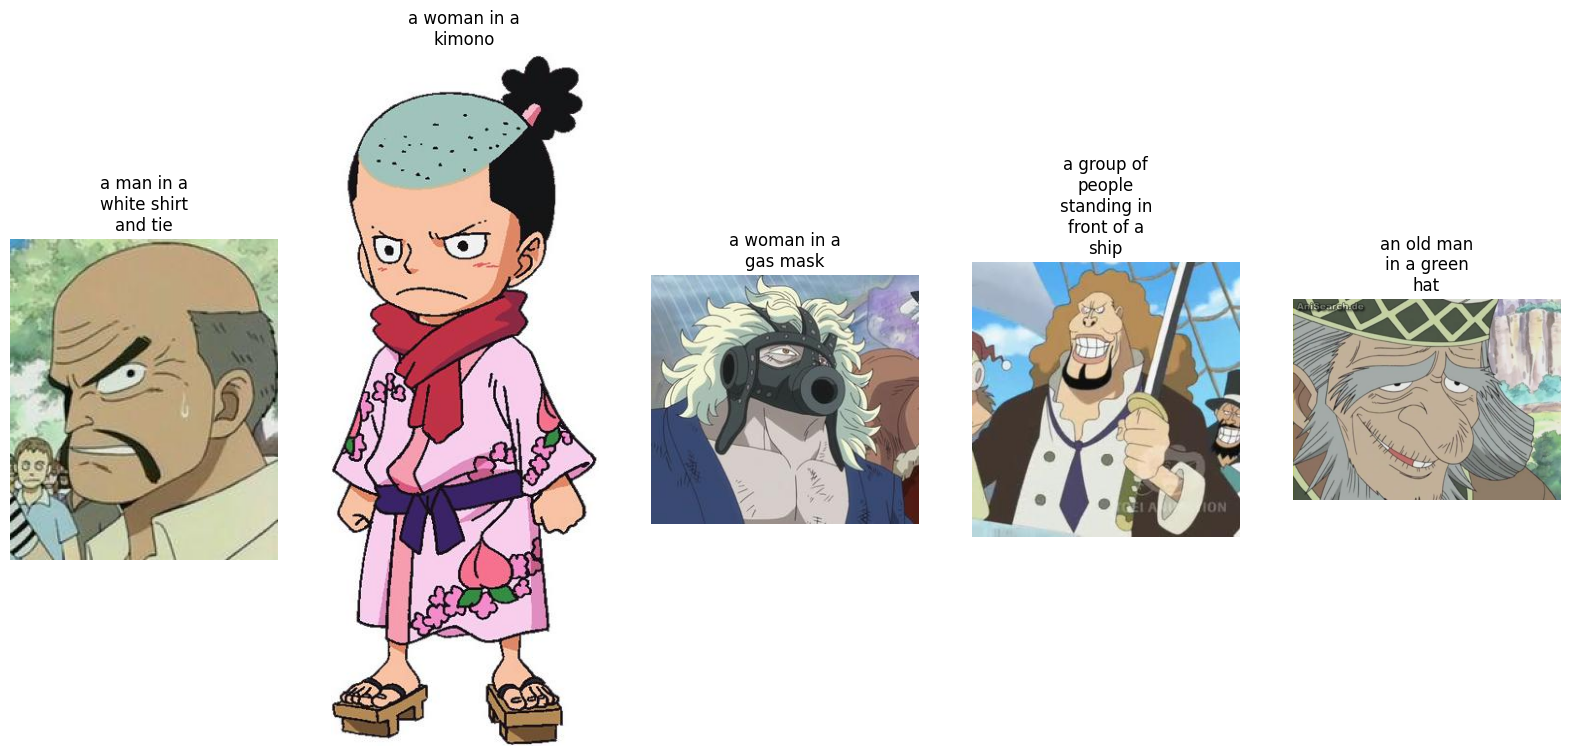

In [ ]:
from textwrap import wrap
import matplotlib.pyplot as plt
import numpy as np


def plot_images(images, captions):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        caption = captions[i]
        caption = "\n".join(wrap(caption, 12))
        plt.title(caption)
        plt.imshow(images[i])
        plt.axis("off")


sample_images_to_visualize = [np.array(train_ds[i]["image"]) for i in range(5)]
sample_captions = [train_ds[i]["text"] for i in range(5)]
plot_images(sample_images_to_visualize, sample_captions)

In [ ]:
from transformers import AutoProcessor

checkpoint = "microsoft/git-base"
processor = AutoProcessor.from_pretrained(checkpoint)

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

c. Transform the data into the appropriate format using the following function:

In [ ]:
def transforms(example_batch):
    images = [x for x in example_batch["image"]]
    captions = [x for x in example_batch["text"]]
    inputs = processor(images=images, text=captions, padding="max_length")
    inputs.update({"labels": inputs["input_ids"]})
    return inputs

train_ds.set_transform(transforms)
test_ds.set_transform(transforms)

In [ ]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

## 3. Evaluation Metrics:

In [ ]:
from evaluate import load
import torch

wer = load("wer")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predicted = logits.argmax(-1)
    decoded_labels = processor.batch_decode(labels, skip_special_tokens=True)
    decoded_predictions = processor.batch_decode(predicted, skip_special_tokens=True)
    wer_score = wer.compute(predictions=decoded_predictions, references=decoded_labels)
    return {"wer_score": wer_score}

## 4. Training:

a. Use Trainer to train and save the model

In [ ]:
from transformers import TrainingArguments, Trainer

model_name = checkpoint.split("/")[1]

training_args = TrainingArguments(
    output_dir=f"{model_name}-onepiece",
    learning_rate=5e-5,
    num_train_epochs=50,
    fp16=True,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    gradient_accumulation_steps=2,
    save_total_limit=3,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    save_steps=50,
    logging_steps=50,
    remove_unused_columns=False,
    label_names=["labels"],
    load_best_model_at_end=True,
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train()

OutOfMemoryError: CUDA out of memory. Tried to allocate 738.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 497.06 MiB is free. Process 15791 has 14.26 GiB memory in use. Of the allocated memory 13.41 GiB is allocated by PyTorch, and 727.34 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
trainer.save_model("./saved_model")

## 5. Inference:

a. Infer the caption for the following image – add the following code segment in your inference code:

b. For inference arguments, make sure you use the following parameters: temperature=0.7, do_sample=True

In [ ]:
from transformers import AutoModelForImageCaptioning, AutoTokenizer
from PIL import Image
import requests
import torch

# Step 5a: Load the fine-tuned model and tokenizer
model_name = "./saved_model"  # Path to the saved fine-tuned model
model = AutoModelForImageCaptioning.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Step 5b: Define inference parameters
inference_args = {
    "temperature": 0.7,
    "do_sample": True
}

# Step 5c: Load the image
url = "https://ami.animecharactersdatabase.com/uploads/chars/12602-925960129.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

# Step 5d: Preprocess the image and generate caption
device = "cuda" if torch.cuda.is_available() else "cpu"
inputs = tokenizer(image, return_tensors="pt", padding="max_length", max_length=128, truncation=True)
inputs.to(device)
with torch.no_grad():
    output = model.generate(**inputs, **inference_args)
caption = tokenizer.decode(output[0], skip_special_tokens=True)

# Step 5e: Print the generated caption
print("Generated Caption:", caption)

## Part 1 Questions

### 1. Explain the objective of the “transforms” function and explain the input and output for each line in the function.




**The objective** of the "transforms" function is indeed to process a batch of examples, typically used in machine learning tasks such as image captioning or similar multimodal tasks where both images and textual descriptions (captions) are involved. The function aims to prepare the data for input into a model by transforming the raw input data into a format suitable for model training or inference. This could involve preprocessing steps such as tokenization, padding, and possibly other transformations specific to the task at hand.

---


**lines of the function:**


1.   `def transforms(example_batch):`

**input:** example_batch (dictionary) containing keys "image" and "text"

**output:** transformed inputs suitable for model input

---

2.   `images = [x for x in example_batch["image"]]`

Extract images from example_batch

**input:** example_batch["image"] (list) containing image data

**output:** images (list) containing image data

---

3.   `captions = [x for x in example_batch["text"]]`

Extract captions from example_batch

**input:** example_batch["text"] (list) containing text data (captions)

**output:** captions (list) containing text data (captions)

---

4.   `inputs = processor(images=images, text=captions, padding="max_length")`

Process images and captions together using some processor (assumed)

**input:** images (list) and captions (list) data for processing

**output:** inputs (dictionary) containing processed data for model input

---

5.   `inputs.update({"labels": inputs["input_ids"]})`

Update inputs dictionary with labels (assuming input_ids as labels)

**input:** inputs (dictionary) containing processed data

**output:** inputs (dictionary) updated with "labels" key

---

6.   `return inputs`

**input:** transformed inputs

**output:** Return the transformed inputs to the call

### 2. Explain the objective of the “compute_metrics” and explain the input and output for each line in the function.


**The objective** of "compute_metrics" function is tailored towards evaluating models that generate sequences, such as those involved in text generation or sequence labeling tasks. By comparing the model's generated sequences with the ground truth (true labels or references), it computes a metric, in this case, the Word Error Rate (WER) score, to quantify the performance of the model.

---


**lines of the function:**


1.   `def compute_metrics(eval_pred):`

**input:** eval_pred (tuple) containing logits and labels

**output:** dictionary containing evaluation metrics

---

2.   `logits, labels = eval_pred`

Unpack logits and labels from eval_pred tuple

**input:** eval_pred (tuple) containing logits (model predictions) and labels

**output:** logits (tensor) containing model predictions, labels (tensor) containing true labels

---

3.   `predicted = logits.argmax(-1)`

Obtain predicted labels by taking the index of maximum logit score

**input:** logits (tensor) containing model predictions

**output:** predicted (tensor) containing predicted labels

---

4.  

```
decoded_labels = processor.batch_decode(labels, skip_special_tokens=True)
decoded_predictions = processor.batch_decode(predicted, skip_special_tokens=True)
```

Decode labels (true captions) and predicted labels

**input:** labels (tensor) containing true labels, predicted (tensor) containing predicted labels

**output:** decoded_labels (list) containing decoded true captions, decoded_predictions (list) containing decoded predicted captions

---

5.   

```
wer_score = wer.compute(predictions=decoded_predictions, references=decoded_labels)
```

Compute Word Error Rate (WER) score between true captions and predicted captions

**input:** decoded_predictions (list) containing decoded predicted captions, decoded_labels (list) containing decoded true captions

**output:** wer_score (float) representing Word Error Rate

---

6.   `return {"wer_score": wer_score}`

**input:** Return a dictionary containing WER score as the evaluation metric

**output:** Dictionary containing evaluation metric(s), in this case, only WER score

### 3. What is the caption for the provided image in the link?

### 4. Change the temperature to the following values and write the caption generated by each: 0.0 and 1.0


# Part 2: Impact of Quantity on ML Models

1. For the same code as in Part 1, vary the training dataset sizes to train on only subsets of the
datasets (400 training examples). Example of code snippet where we take a subset of 400 examples from the training dataset:

In [ ]:
from datasets import load_dataset

dataset = load_dataset("YaYaB/onepiece-blip-captions")

train_test_split = dataset["train"].train_test_split(test_size=0.1, seed=42)
train_dataset = train_test_split["train"][:400]

train_dataset_sub = train_dataset.map(transforms, batched=True)
test_dataset_sub = train_test_split["test"].map(transforms, batched=True)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_sub,
    eval_dataset=test_dataset_sub,
    compute_metrics=compute_metrics,
)

trainer.train()

trainer.save_model("./saved_model")

## Part 2 Questions

### 1. Write the generated captions for the same image as in Part 1.5

### 2. Provide a concise analysis of the output observations, drawing comparisons between the captions identified in this context and the captions generated during training on the complete training dataset.

# Part 3: Impact of Quality on ML Models

1. For the same code as in Part 1, vary the quality of the training dataset by particularly removing training examples that have any captions with words “man”, “shirt”, “tie”.

In [ ]:
from datasets import load_dataset

dataset = load_dataset("YaYaB/onepiece-blip-captions")

train_data, test_data = train_test_split(dataset["train"], test_size=0.1, seed=42)

exclude_words = ["man", "shirt", "tie"]

exclude_idx = []
for index, instance in enumerate(train_data):
    for word in exclude_words:
        if word in instance["text"]:
            exclude_idx.append(index)
            break

print("Number of excluded items:", len(exclude_idx))
train_data = train_data.select(
    [i for i in range(len(train_data)) if i not in set(exclude_idx)]
)

train_data_ex = train_data.map(transforms, batched=True)
test_data_ex = test_data.map(transforms, batched=True)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data_ex,
    eval_dataset=test_data_ex,
    compute_metrics=compute_metrics,
)

trainer.train()

trainer.save_model("./saved_model")

## Part 3 Questions

### 1. Write the generated captions for the same image as in Part 1.5

### 2. Provide a concise analysis of the output observations, drawing comparisons between the captions identified in this context and the captions generated during training on the complete training dataset without changing the quality of the datasets.